## Project Description

This project will mainly focused on EDA (Exploratory Data Analysis) on Mass Shooting in USA dataset that obtain from Kaggle. The dataset contains mass shooting data from 1992 to 2022. There are 4 charts being shown in this notebook to assist decision making process from the dataset.

Dataset Link: https://www.kaggle.com/datasets/rprkh15/history-of-mass-shootings-in-the-usa

## Import Necessary Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Read Dataset

In [3]:
df = pd.read_csv('dataset/mass_shooting_in_usa.csv')

In [4]:
df.head()

,Date,City,State,Dead,Injured,Total,Description
0,31-07-2022,Decatur,Illinois,1,3,4,"Four teenagers, one of whom died, were shot at..."
1,31-07-2022,Hartford,Connecticut,0,4,4,"Four people, including a teenager, were shot i..."
2,31-07-2022,Indianapolis,Indiana,0,4,4,Four people were shot after a fight in the Bro...
3,31-07-2022,Detroit,Michigan,1,7,8,"One person was killed, and seven others were i..."
4,31-07-2022,Orlando,Florida,0,7,7,Seven people were shot when someone opened fir...


In [5]:
df.shape

(2712, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2712 non-null   object
 1   City         2712 non-null   object
 2   State        2712 non-null   object
 3   Dead         2712 non-null   int64 
 4   Injured      2712 non-null   int64 
 5   Total        2712 non-null   int64 
 6   Description  2712 non-null   object
dtypes: int64(3), object(4)
memory usage: 148.4+ KB


In [7]:
df.dtypes

Date           object
City           object
State          object
Dead            int64
Injured         int64
Total           int64
Description    object
dtype: object

In [8]:
df.isnull().sum()

Date           0
City           0
State          0
Dead           0
Injured        0
Total          0
Description    0
dtype: int64

In [9]:
df.describe()

,Dead,Injured,Total
count,2712.000000,2712.000000,2712.000000
mean,1.436578,4.401180,5.837021
std,2.880447,8.532826,10.130793
min,0.000000,0.000000,2.000000
25%,0.000000,3.000000,4.000000
50%,1.000000,4.000000,4.000000
75%,2.000000,5.000000,6.000000
max,61.000000,411.000000,472.000000


## Convert Data Type

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df.head()

,Date,City,State,Dead,Injured,Total,Description
0,2022-07-31,Decatur,Illinois,1,3,4,"Four teenagers, one of whom died, were shot at..."
1,2022-07-31,Hartford,Connecticut,0,4,4,"Four people, including a teenager, were shot i..."
2,2022-07-31,Indianapolis,Indiana,0,4,4,Four people were shot after a fight in the Bro...
3,2022-07-31,Detroit,Michigan,1,7,8,"One person was killed, and seven others were i..."
4,2022-07-31,Orlando,Florida,0,7,7,Seven people were shot when someone opened fir...


## 1. Dead Victim Count Caused By Shooting Per Year

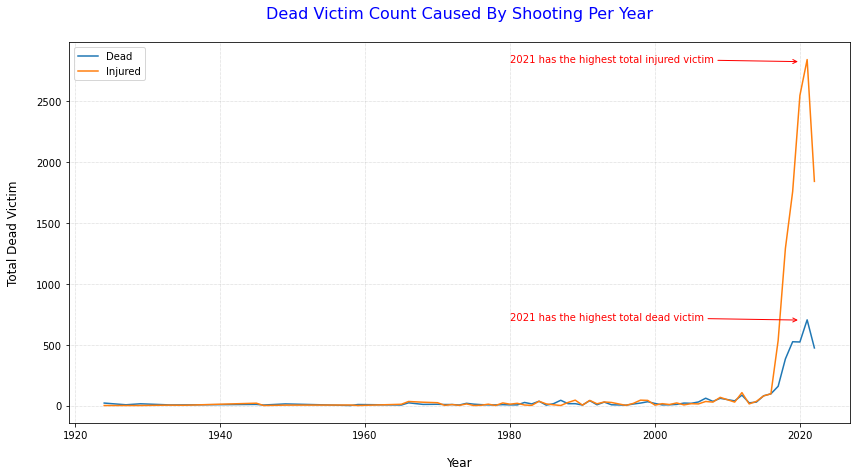

In [50]:
df.groupby(df['Date'].dt.year)[['Dead', 'Injured']].sum().plot()

plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.title('Dead Victim Count Caused By Shooting Per Year', color='blue', fontsize=16, pad=24)
plt.xlabel('Year', fontsize=12, labelpad=16)
plt.ylabel('Total Dead Victim', fontsize=12, labelpad=16)
plt.annotate('2021 has the highest total dead victim', xy=(2020, 702), xytext=(1980, 702), color='red', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red'))
plt.annotate('2021 has the highest total injured victim', xy=(2020, 2826), xytext=(1980, 2826), color='red', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red'))
plt.gcf().set_size_inches(14, 7)
plt.show()

## 2. Dead And Injured Victim Comparison Caused By Shooting In USA

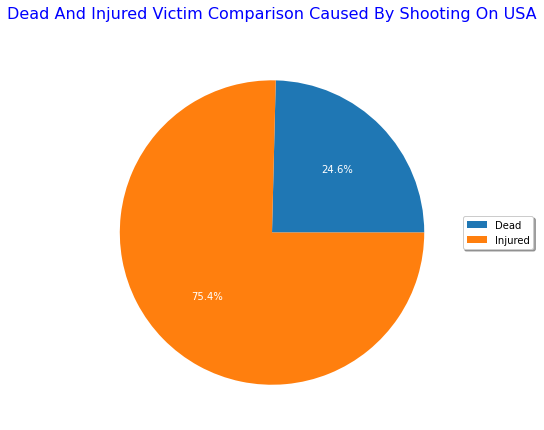

In [32]:
dead_injured_comparison = df[['Dead', 'Injured']].sum()

patchers, _, texts = plt.pie(dead_injured_comparison, autopct='%1.1f%%')
for text in texts:
    text.set_color('white')
plt.title('Dead And Injured Victim Comparison Caused By Shooting On USA', color='blue', fontsize=16, pad=24)
plt.legend(['Dead', 'Injured'], loc='right', bbox_to_anchor=(1.2, .5), shadow=True)
plt.gcf().set_size_inches(14, 7)
plt.show()

## 3. Top 5 Shooting Incident Distribution Based On State

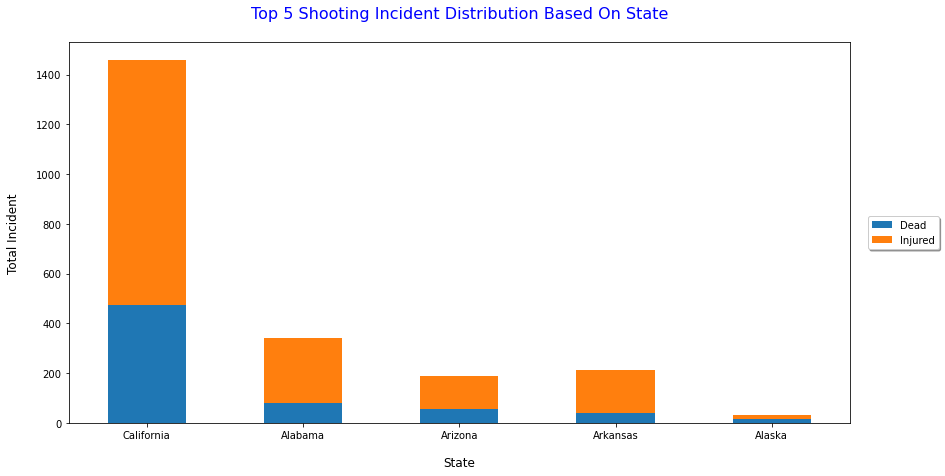

In [33]:
df.groupby('State')[['Dead', 'Injured']].sum().head().sort_values(by='Dead', ascending=False).plot(kind='bar', stacked=True)

plt.title('Top 5 Shooting Incident Distribution Based On State', fontsize=16, color='blue', pad=24)
plt.xlabel('State', fontsize=12, labelpad=16)
plt.xticks(rotation=0)
plt.ylabel('Total Incident', fontsize=12, labelpad=16)
plt.legend(loc='right', bbox_to_anchor=(1.12, 0.5), shadow=True)
plt.gcf().set_size_inches(14, 7)
plt.show()

## 4. Top 10 Shooting Incident Distribution Based On State

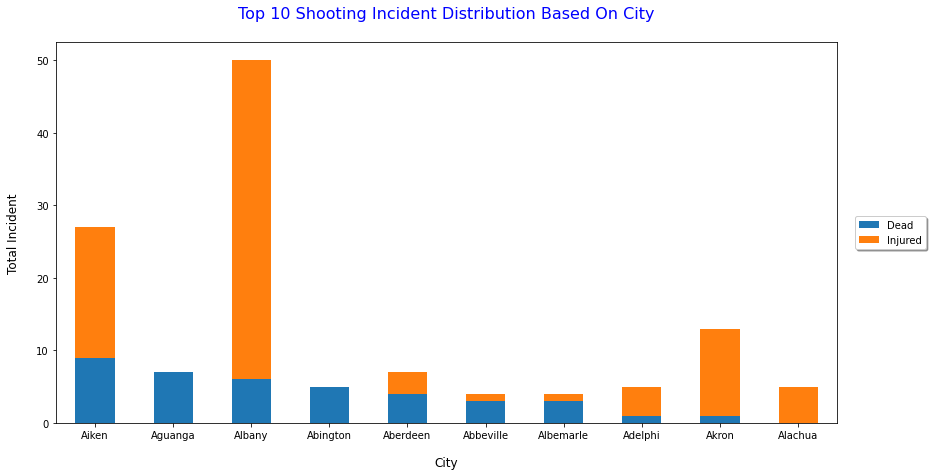

In [38]:
df.groupby('City')[['Dead', 'Injured']].sum().head(10).sort_values(by='Dead', ascending=False).plot(kind='bar', stacked=True)

plt.title('Top 10 Shooting Incident Distribution Based On City', fontsize=16, color='blue', pad=24)
plt.xlabel('City', fontsize=12, labelpad=16)
plt.xticks(rotation=0)
plt.ylabel('Total Incident', fontsize=12, labelpad=16)
plt.legend(loc='right', bbox_to_anchor=(1.12, 0.5), shadow=True)
plt.gcf().set_size_inches(14, 7)
plt.show()

## Summary From Dataset

1. 2021 is the year with the most mass shooting incident in USA
2. By 2022, there are 75% victim injured caused by mass shooting in USA, and around 24% victim dead caused by the shooting incident in total
3. From the dataset, it can be concluded that Alaska state will be safer to live compare to California
4. From the dataset, it can be concluded that Alachua city is pretty safe to live at USA, compare to other 9 city that displayed on the above chart
5. By 2022, the number of shooting incident is going down compared to the previous year, which is 2019, 2020, and 2021

## Summary From Other Article Regarding Dataset

The reason behind the rise of shooting incident on the year of 2020 is there are rise of gun transactions around 60% in USA due to the COVID-19 pandemic. The 60% of gun transactions include 1.3 millions handguns and 700,000 rifles and shotguns.

The reason behind the rise of gun transactions on the year of 2020 is there are around 30% active shooter have mental health problem. Many of them kill others because of narcissistic or disordered personalities which make them feel that mass shooting is the way to resolve their distress in life.

Reference: https://theconversation.com/mass-shootings-in-the-us-have-risen-sharply-in-2020-why-150981

## Hypothesis From Above Summary

If the reason behind the rise of shooting incident on the year of 2020 is due to the COVID-19 pandemic, then, starting from 2022, the mass shooting incident should be slowly decreased compared to the year of 2020, because, by 2022, the world has slowly recovered from the COVID-19 pandemic. The hypothesis can be proofed by the first chart, which shows that there's a significant decreased on the number of victim that caused by mass shooting on 2022 compared to the previous year.